In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.51GB/s]


In [ ]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


Carga de los datos

In [ ]:
train = pd.read_csv("train.csv", na_values=["", " ", "NO SABE", "SIN INFORMACION", "NS/NR"])

print("Tamaño del train:", train.shape)
train.head()


Tamaño del train: (692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Inspección inicial de los datos

In [ ]:
train.info()
print("\nValores nulos por columna (top 10):")
print(train.isnull().sum().sort_values(ascending=False).head(10))

print("\nValores únicos por variable categórica:")
for col in train.select_dtypes(include="object").columns:
    print(f"{col}: {train[col].nunique()} valores únicos")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

Limpieza general

In [ ]:
if "ID" in train.columns:
    train = train.drop(columns=["ID"])

In [ ]:
train = train.drop_duplicates()

In [ ]:
train.columns = train.columns.str.strip().str.replace(" ", "_").str.upper()

Numéricas - mediana

Categóricas - “DESCONOCIDO”

In [ ]:
for col in train.select_dtypes(include=[np.number]).columns:
    med = train[col].median()
    train[col].fillna(med, inplace=True)

for col in train.select_dtypes(include="object").columns:
    train[col].fillna("DESCONOCIDO", inplace=True)

print("Valores nulos restantes:", train.isnull().sum().sum())

Valores nulos restantes: 0


Análisis exploratorio básico

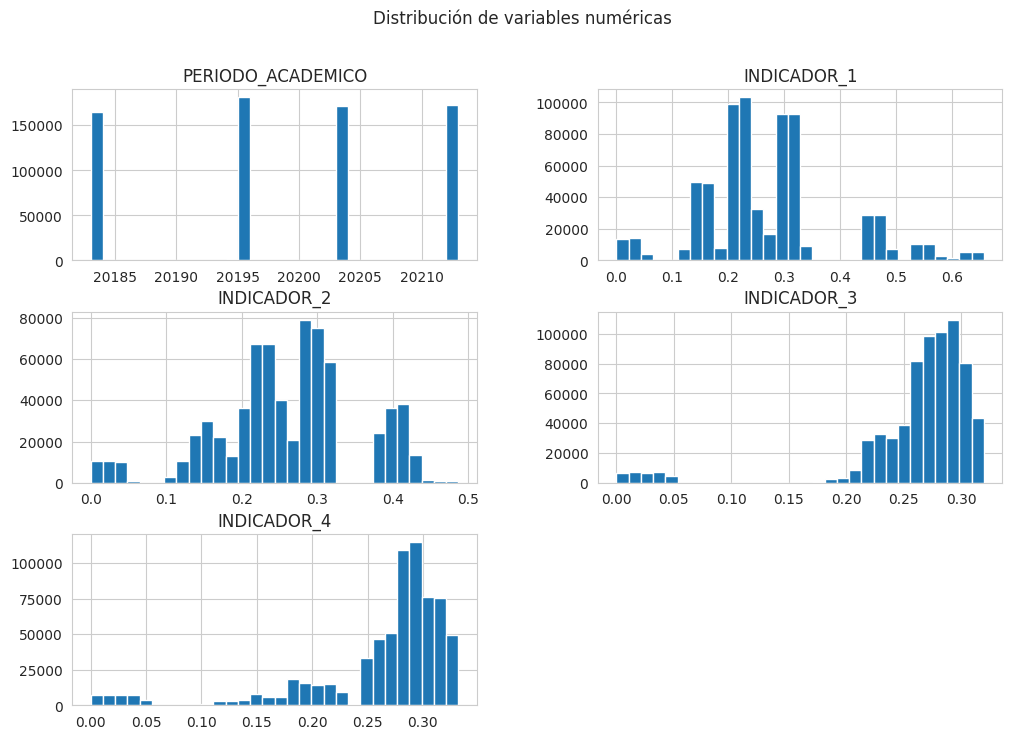

In [ ]:
num_cols = train.select_dtypes(include=np.number).columns
train[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribución de variables numéricas")
plt.show()


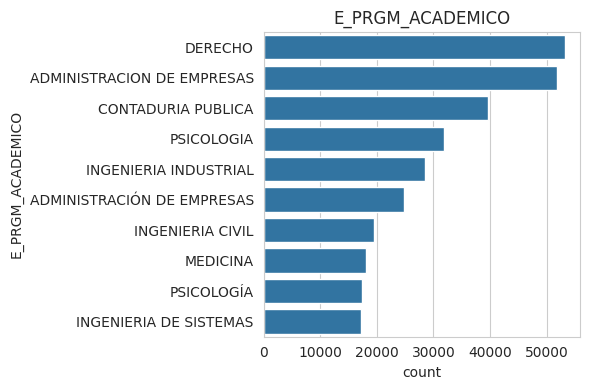

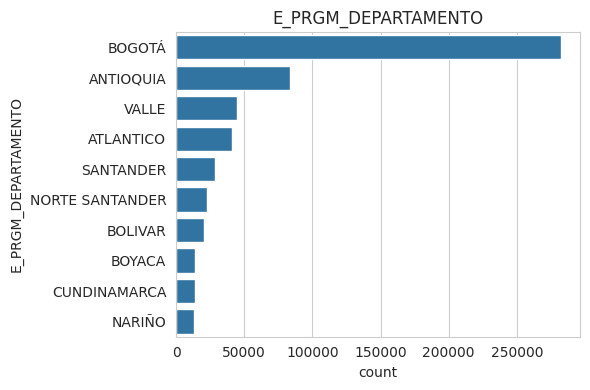

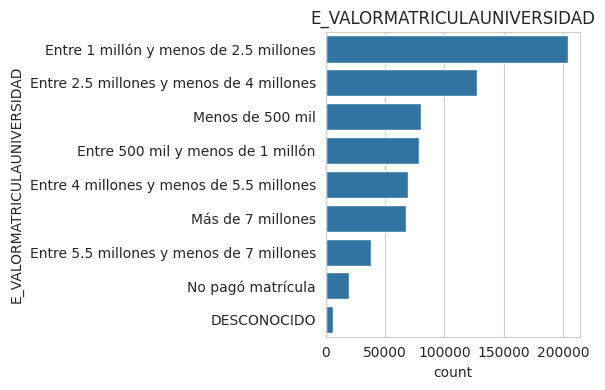

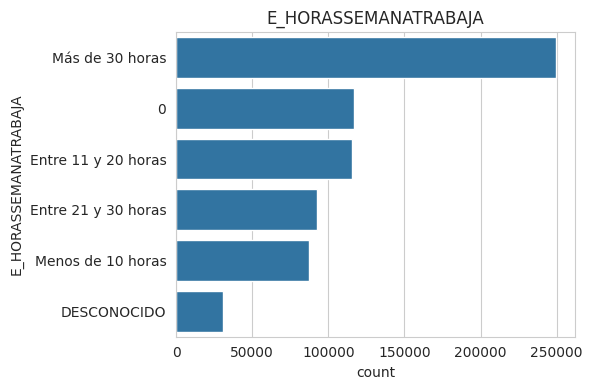

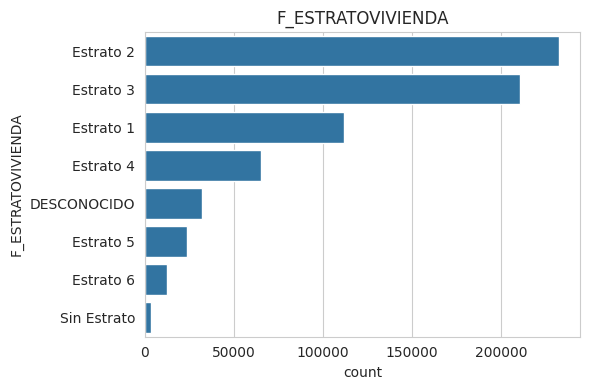

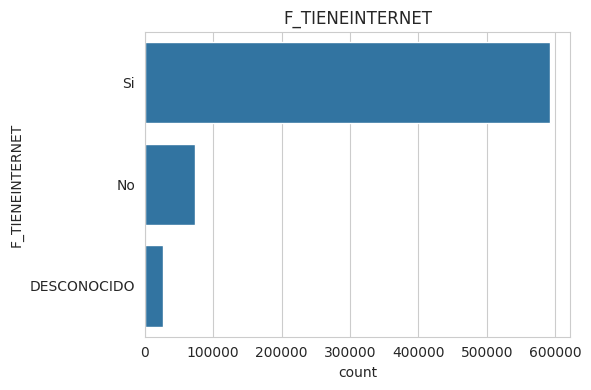

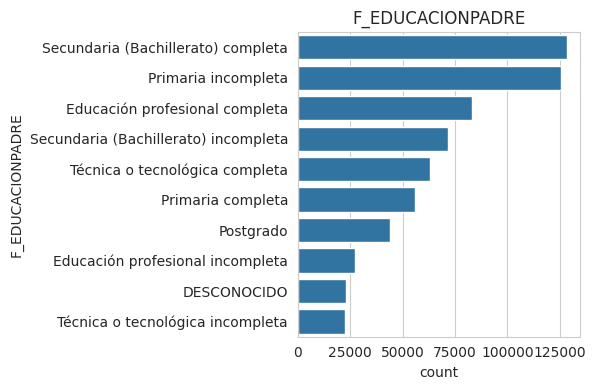

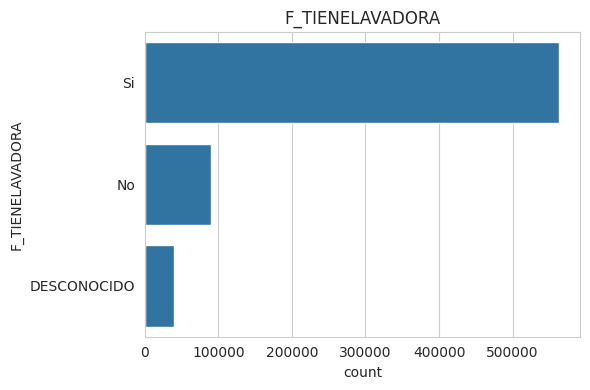

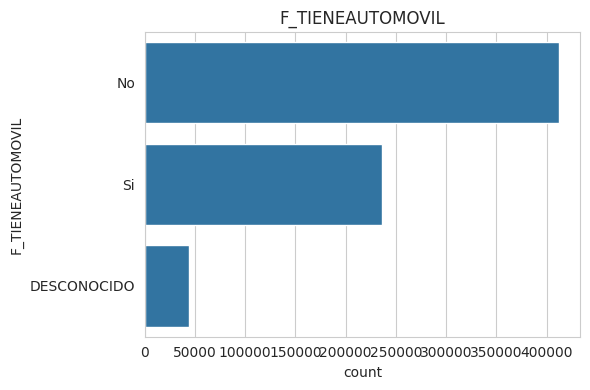

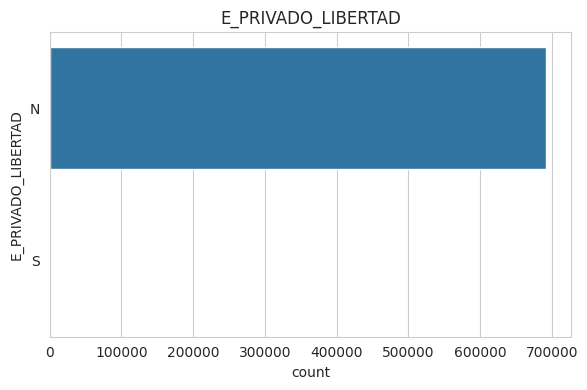

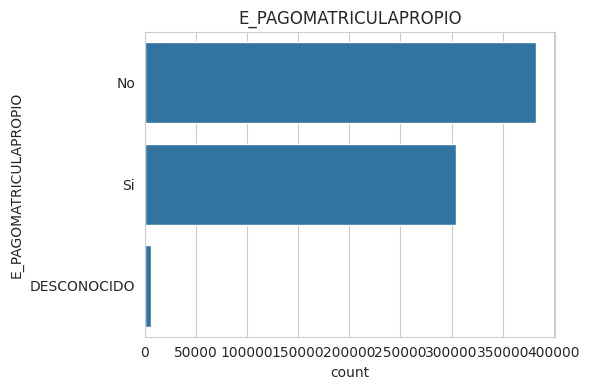

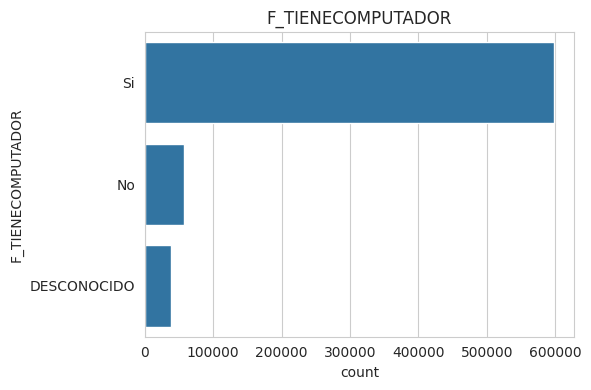

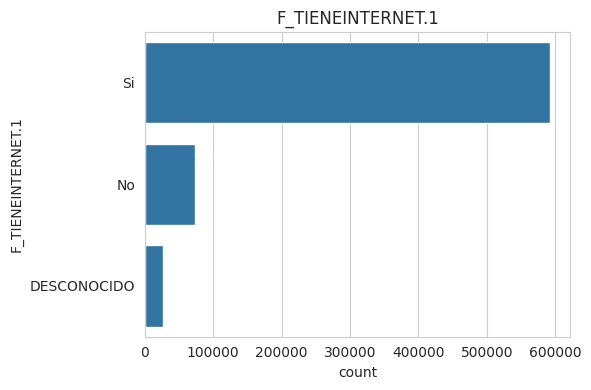

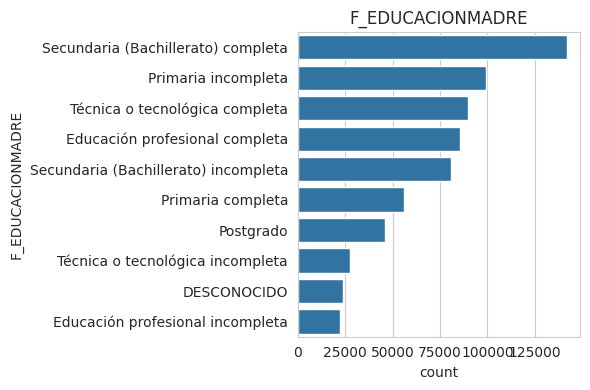

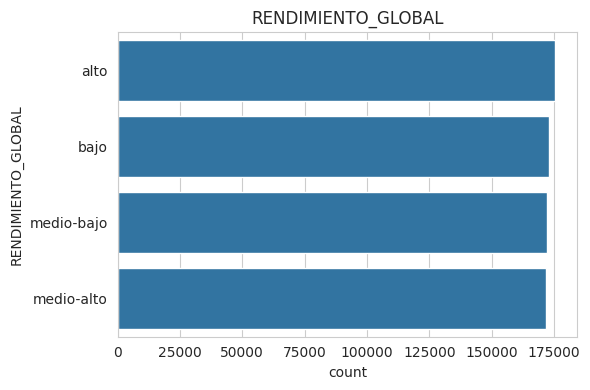

In [ ]:
cat_cols = train.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=train, order=train[col].value_counts().head(10).index)
    plt.title(col)
    plt.tight_layout()
    plt.show()


Codificación de variables categóricas
OneHotEncoder - variables con ≤ 20 categorías.

OrdinalEncoder - variables con > 20 categorías (para ahorrar memoria).

In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

low_card_cols = [c for c in categorical_cols if train[c].nunique() <= 20]
high_card_cols = [c for c in categorical_cols if train[c].nunique() > 20]

print("Variables categóricas de baja cardinalidad:", low_card_cols)
print("Variables categóricas de alta cardinalidad:", high_card_cols)



Variables categóricas de baja cardinalidad: ['E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']
Variables categóricas de alta cardinalidad: ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO']


Preprocesamiento

In [ ]:
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_pipeline, low_card_cols),
    ('ordinal', ordinal_pipeline, high_card_cols),
    ('num', 'passthrough', numeric_cols)
])


Aplicar transformaciones y reconstruir el DataFrame

In [ ]:
train_encoded = preprocessor.fit_transform(train)

onehot_features = preprocessor.named_transformers_['onehot'].named_steps['encoder'].get_feature_names_out(low_card_cols)
all_features = list(onehot_features) + high_card_cols + list(numeric_cols)

train_encoded = pd.DataFrame(train_encoded, columns=all_features)

print("Shape final del dataset codificado:", train_encoded.shape)
train_encoded.head()


Shape final del dataset codificado: (692500, 80)


,E_VALORMATRICULAUNIVERSIDAD_DESCONOCIDO,E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,E_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,E_HORASSEMANATRABAJA_0,E_HORASSEMANATRABAJA_DESCONOCIDO,E_HORASSEMANATRABAJA_Entre 11 y 20 horas,E_HORASSEMANATRABAJA_Entre 21 y 30 horas,E_HORASSEMANATRABAJA_Menos de 10 horas,E_HORASSEMANATRABAJA_Más de 30 horas,F_ESTRATOVIVIENDA_DESCONOCIDO,F_ESTRATOVIVIENDA_Estrato 1,F_ESTRATOVIVIENDA_Estrato 2,F_ESTRATOVIVIENDA_Estrato 3,F_ESTRATOVIVIENDA_Estrato 4,F_ESTRATOVIVIENDA_Estrato 5,F_ESTRATOVIVIENDA_Estrato 6,F_ESTRATOVIVIENDA_Sin Estrato,F_TIENEINTERNET_DESCONOCIDO,F_TIENEINTERNET_No,F_TIENEINTERNET_Si,F_EDUCACIONPADRE_DESCONOCIDO,F_EDUCACIONPADRE_Educación profesional completa,F_EDUCACIONPADRE_Educación profesional incompleta,F_EDUCACIONPADRE_Ninguno,F_EDUCACIONPADRE_No Aplica,F_EDUCACIONPADRE_No sabe,F_EDUCACIONPADRE_Postgrado,F_EDUCACIONPADRE_Primaria completa,F_EDUCACIONPADRE_Primaria incompleta,F_EDUCACIONPADRE_Secundaria (Bachillerato) completa,F_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONPADRE_Técnica o tecnológica completa,F_EDUCACIONPADRE_Técnica o tecnológica incompleta,F_TIENELAVADORA_DESCONOCIDO,F_TIENELAVADORA_No,F_TIENELAVADORA_Si,F_TIENEAUTOMOVIL_DESCONOCIDO,F_TIENEAUTOMOVIL_No,F_TIENEAUTOMOVIL_Si,E_PRIVADO_LIBERTAD_N,E_PRIVADO_LIBERTAD_S,E_PAGOMATRICULAPROPIO_DESCONOCIDO,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si,F_TIENECOMPUTADOR_DESCONOCIDO,F_TIENECOMPUTADOR_No,F_TIENECOMPUTADOR_Si,F_TIENEINTERNET.1_DESCONOCIDO,F_TIENEINTERNET.1_No,F_TIENEINTERNET.1_Si,F_EDUCACIONMADRE_DESCONOCIDO,F_EDUCACIONMADRE_Educación profesional completa,F_EDUCACIONMADRE_Educación profesional incompleta,F_EDUCACIONMADRE_Ninguno,F_EDUCACIONMADRE_No Aplica,F_EDUCACIONMADRE_No sabe,F_EDUCACIONMADRE_Postgrado,F_EDUCACIONMADRE_Primaria completa,F_EDUCACIONMADRE_Primaria incompleta,F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE_Técnica o tecnológica completa,F_EDUCACIONMADRE_Técnica o tecnológica incompleta,RENDIMIENTO_GLOBAL_alto,RENDIMIENTO_GLOBAL_bajo,RENDIMIENTO_GLOBAL_medio-alto,RENDIMIENTO_GLOBAL_medio-bajo,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,PERIODO_ACADEMICO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,300.0,4.0,20212.0,0.322,0.208,0.310,0.267
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,249.0,3.0,20212.0,0.311,0.215,0.292,0.264
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,819.0,4.0,20203.0,0.297,0.214,0.305,0.264
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.0,26.0,20195.0,0.485,0.172,0.252,0.190
4,0.

Normalización de variables numéricas

In [ ]:
scaler = MinMaxScaler()
train_encoded[numeric_cols] = scaler.fit_transform(train_encoded[numeric_cols])

Guardar conjunto preprocesado

In [ ]:
train_encoded.to_csv("train_preprocesado.csv", index=False)
print("Archivo preprocesado guardado correctamente.")

Archivo preprocesado guardado correctamente.
